# **Homework 2:** Priors, regularization, and shrinkage
STATS348, UChicago, Spring 2024

----------------
**Your name here:**

Alex Huang

----------------

<a href="https://colab.research.google.com/github/aschein/stat_348_2024/blob/main/assignments/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Instructions

The purpose of this homework is apply the ideas from lectures 3 and 4 on regularizers, priors, and shrinkage.

Please fill out your answers in the provided spaces below. When you are finished, export the notebook as a PDF, making sure that all of your solutions are clearly visible.

Assignment is due **Saturday April 6, 11:59pm** on GradeScope.

----

## **Problem 1:** Regularization and Priors
              
Consider a standard regression setting with fixed design $X\in\mathbb{R}^{n\times p}$ and
$$
    y=X\beta+\varepsilon
$$
where $\varepsilon\sim\mathcal{N}(0,\sigma^2 I_p)$ for variance $\sigma^2$ considered known and fixed.

The **elastic net criterion** is a regularized loss function defined as $\ell_\mathrm{EN}(\lambda_1,\lambda_2,\beta)=\|y-X\beta\|_2^2 + \lambda_1\|\beta\|_1+\lambda_2\|\beta\|_2^2$, and the **elastic net estimator** is defined as its minimizer:
$$
\widehat{\beta}^\textrm{EN}(\lambda_1,\lambda_2):=\underset{\beta}{\textrm{argmin}} \,\, \ell_\mathrm{EN}(\lambda_1,\lambda_2,\beta)
$$
In lecture, we saw a correspondence between Ridge and LASSO estimators with MAP estimates under normal and Laplace priors, respectively. 

----
- **1a)** Provide the form **up to proportionality** of a prior density $P(\beta)$ on the regression coefficients such that the MAP estimate under $P(\beta)$ corresponds to $\widehat{\beta}^\mathrm{EN}(\lambda_1,\lambda_2)$. In the space below, please state $P(\beta)$ clearly, and provide a brief justification. 

$$P(\beta) \propto_{\beta} \exp\left(- \lambda_1\|\beta\|_1 - \lambda_2\|\beta\|_2^2\right)$$

This choice of prior is proportional to an exponential term that penalizes both the L1 and L2 norms of the coefficients. The penalty terms $\lambda_1\|\beta\|_1$ and $\lambda_2\|\beta\|_2^2$ mimic the regularization terms in the elastic net criterion. Therefore, the MAP estimate under this prior corresponds to the elastic net estimator.

----

- **1b)** Consider a dataset where the input feature $x$ is generated from a uniform distribution over the interval $[-3,3]$, and the corresponding target $y$ is generated as
$$y_i=2x_i^3 - x_i^2 + \varepsilon_i$$
where $\varepsilon_i\sim\mathcal{N}(0,10)$ is a noise term (with _variance_ 10). Use the code block below to simulate a dataset of $n=20$ data points in Python.

In [48]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

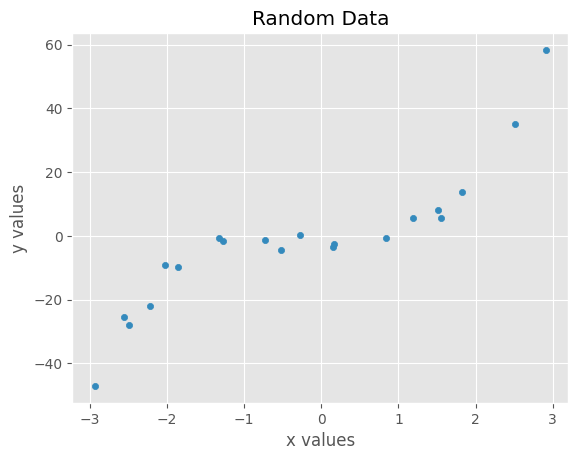

In [53]:
# Your code here

n = 20
x = np.random.rand(n) * 6 - 3
epsilon = np.random.normal(0, np.sqrt(10), size=n)
# epsilon
y = 2 * x ** 3 + x ** 2 + epsilon

data = pd.DataFrame({'x': x, 'y': y})
data.plot.scatter(x='x', y='y', xlabel='x values', ylabel='y values', title='Random Data')
plt.show()

---
Now consider the following model of the data using a 5th degree polynomial regression. 
$$y_i=\beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \ldots + \beta_5 x_i^5 + \varepsilon_i$$
where the noise is assumed $\varepsilon_i \sim \mathcal{N}(0,1)$ (with _variance_ 1).
- **1c)**  Estimate the coefficients using maximum likelihood as $\widehat{\beta}^\mathrm{MLE}$. In the code block below, do this programmatically using scikit-learn's [PolynomialFeatures preprocessor](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). (You may have to import other methods/libraries as well.)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from IPython.display import Markdown

# Your code here
poly_model = PolynomialFeatures(degree=5)
x_poly = poly_model.fit_transform(x.reshape((-1,1)))
# display(pd.DataFrame(x).T)
# display(pd.DataFrame(x_poly))
lr_model = LinearRegression()
lr_model.fit(x_poly, y)

result = "Since the error terms are assumed to be normal we can use linear regression.\n\nThe following output are the betas to the 5th degree polynomial regression:\n"
result += "\\begin{align*}"
result += f"\\beta_{0} &= {lr_model.intercept_:.4f} \\\\"
for i in range(1,6):
    result += f"\\beta_{i} &= {lr_model.coef_[i]:.4f} \\\\"
result += "\\end{align*}"
display(Markdown(result))

Since the error terms are assumed to be normal we can use linear regression.

The following output are the betas to the 5th degree polynomial regression:
\begin{align*}\beta_0 &= -1.7951 \\\beta_1 &= -0.6327 \\\beta_2 &= 1.5022 \\\beta_3 &= 1.8541 \\\beta_4 &= -0.0733 \\\beta_5 &= 0.0381 \\\end{align*}

----
Now, consider a prior of $\beta\sim\mathcal{N}(0,\sigma_0^2)$ on the regression coefficients. 

- **1d)**: Provide the form of the MAP solution  $\widehat{\beta}^{\textrm{MAP}}(\sigma_0^2)$ below:

$$\widehat{\beta}^{\textrm{MAP}}(\sigma_0^2) = $$

---
$$
\begin{align*}
    \widehat{\beta}^{\textrm{MAP}}(\sigma_0^2) &= \argmax_{\widehat{\beta}} \mathbb{ \ P}(\widehat{\beta} | \sigma_0^2) \\
    &\propto \argmax_{\widehat{\beta}} \mathbb{ \ P}(\sigma_0^2 | \widehat{\beta}) \cdot \mathbb{ \ P}( \widehat{\beta}) \\
\end{align*}
$$
---

The Maximum A Posteriori (MAP) solution for the regression coefficients given a prior of $\beta \sim \mathcal{N}(0,\sigma_0^2)$ can be obtained by combining the likelihood function with the prior distribution.

Given the likelihood function $P(y|X,\beta)$ and the prior distribution $P(\beta)$, the MAP solution $\widehat{\beta}^{\textrm{MAP}}$ is obtained by maximizing the posterior distribution $P(\beta|y,X)$, which is proportional to the product of the likelihood and the prior.

Since the likelihood function follows a Gaussian distribution and the prior is also Gaussian, the posterior distribution will be Gaussian as well, and the MAP solution can be obtained analytically. The MAP estimate of $\beta$ is the mean of the posterior distribution, which is given by the formula:

$$\widehat{\beta}^{\textrm{MAP}}(\sigma_0^2) = \left(X^TX + \frac{\sigma^2}{\sigma_0^2}I\right)^{-1}X^Ty$$

where:
- $X$ is the design matrix,
- $y$ is the vector of observations,
- $\sigma^2$ is the variance of the error term in the likelihood function,
- $\sigma_0^2$ is the variance of the prior distribution,
- $I$ is the identity matrix.

This formula combines the information from the data (given by $X$ and $y$) with the prior knowledge (controlled by the parameter $\sigma_0^2$).

---
- **1e)** In the code block below, implement the MAP estimator for a given $\sigma_0^2$ (using any methods or libraries you like):



In [55]:
def map_estimate(y, X, sigma0):
    # Calculate X^T * X
    XTX = X.T @ X
    # Calculate X^T * y
    XTy = X.T @ y
    
    # Calculate the MAP estimate
    sigma_sq = 1  # Assuming variance of the error term is known and fixed
    lambda_ = sigma_sq / sigma0**2  # Calculate the lambda parameter
    beta_map = np.linalg.inv(XTX + lambda_ * np.eye(X.shape[1])) @ XTy
    
    return beta_map

----

- **1f)** Fit the MAP estimate to the synthetic data you generated above, experimenting with different values for $\sigma_0^2$. Find a value that seems "too large", a value that seems "too small", and a value that seems "just right" based on plotting and inspecting the learned regression functions. (These judgements are subjective, we are not expecting specific values, just reasonable ones.)  Once you have selected three values, display clearly in a single plot the following:

    - The dataset $(x_1,y_1),\ldots,(x_{20},y_{20})$

    - The estimated regression function using using $\widehat{\beta}_\mathrm{MLE}$
 
    - The three estimated regression functions $\widehat{\beta}^{\textrm{MAP}}(\sigma_0^2)$ for the selected three values of $\sigma_0^2$

    Make sure your plot includes a legend that clearly indicates the different functions.




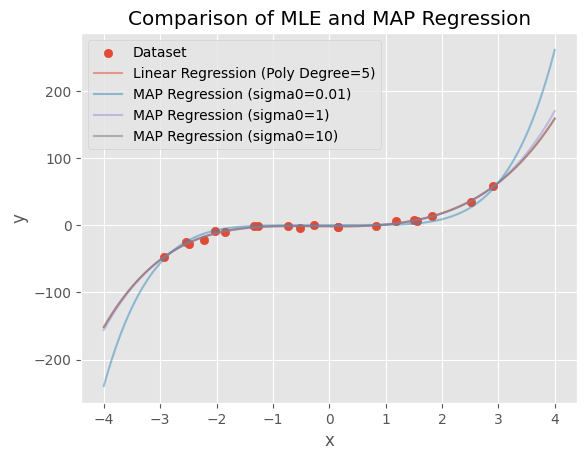

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your code here
import matplotlib.pyplot as plt

# Assuming X and y are your synthetic data
# Assuming map_estimate function is defined

# Fit MLE estimate
mle_model = LinearRegression()
mle_model.fit(x_poly, y.reshape((-1,1)))

# Define different values of sigma0 for MAP estimation
sigma0_values = [0.01, 1, 10]

# # Plot dataset
plt.scatter(x.reshape((-1,1)), y.reshape((-1,1)), label='Dataset')

# Plot MLE regression function
space = np.linspace(-4,4,900).reshape((-1,1))
lr_model.predict(poly_model.fit_transform(space)).reshape(-1,1)
plt.plot(space.reshape((-1,1)), lr_model.predict(poly_model.fit_transform(space)).reshape(-1,1), label=f'Linear Regression (Poly Degree=5)', alpha=0.5)

# # Plot MAP regression functions for different sigma0 values
for sigma0 in sigma0_values:
    beta_map = map_estimate(y.reshape((-1,1)), x_poly, sigma0)
    plt.plot(space.reshape((-1,1)), poly_model.fit_transform(space) @ beta_map, label=f'MAP Regression (sigma0={sigma0})', alpha=0.5)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of MLE and MAP Regression')
plt.show()

--- 
- **1g)** Discuss your findings plot above.

    - How does the MLE compare to the three different MAP solutions?
    
    - Why did you select the three values of $\sigma_0^2$ that you did? 


Your answer here

---

**Answer:**

MLE looks similar to MAP solution when the intial $\sigma_0^2$ is large. This is likely because, as the initial $\sigma_0^2$ gets smaller, the regularization constant gets stronger, punishing larger $ \beta $, and thereby flattening the regression to look more like the MLE regression.

I chose the 3 $\sigma_0^2$ values to test a wider range of regularization constant values in order to see its impact on the regression.

--- 

## **Problem 2:** Estimating SEPs with binomial trials

#### **Setting**

It is May 1968 and the USS _Scorpion_ has just disappeared somewhere in the Atlantic Ocean, likely off the coast of Spain. You are the lone statistician on board the USS _Mizar_, which has been dispatched to find the missing submarine. Your job is to guide the search as best you can, given the data at your disposal.

#### **Search effectiveness probability (SEP)**
As we saw in lecture, an important component of our decision problem is the _search effectiveness probability_ of each search cell $k$

\begin{equation}
q_k = P(\textrm{finding the sub in $k$} \mid \textrm{sub is in $k$ and the divers search $k$})
\end{equation}

#### **Binomial trials**
To collect data that we can use to estimate these SEPs, our divers have been running trials to see if they can recover large objects thrown overboard in each cell $k$. Define the following quantity:
\begin{align}
y_k &\in \{0,\dots, n_k\}&\textrm{ the number of successful trials in $k$}
\end{align}

where $n_k$ is the total number of trials in $k$.
We will assume the following likelihood for $y_k$ given the SEP $q_k$:
\begin{align}
y_k &\stackrel{\textrm{ind.}}{\sim} \textrm{Binom}(n_k,\, q_k) \textrm{ for cell } k = 1\dots K
\end{align}

#### **Beta prior**
Now further assume the following prior for the SEPs:
\begin{align}
q_k &\stackrel{\textrm{iid}}{\sim} \textrm{Beta}(a_0,\,b_0) \textrm{ for cell } k = 1\dots K
\end{align}
where $a_0$ and $b_0$ are the Beta prior's shape parameters.


----

- **2a):** Provide an analytic expression (i.e., without any integrals) for the negative log marginal likelihood $-\log P(\boldsymbol{y}_{1:K} \mid \boldsymbol{n}_{1:K}, a_0,\,b_0\,)$ where $\boldsymbol{y}_{1:K}\equiv (y_{1},\dots,y_{K})$ and $\boldsymbol{n}_{1:K}\equiv (n_{1},\dots,n_{K})$ are the data across all cells. Provide your answer below, along with a brief justification.

From the binomial trials above, we are given that 
\begin{align}
y_k &\stackrel{\textrm{ind.}}{\sim} \textrm{Binom}(n_k,\, q_k) \textrm{ for cell } k = 1\dots K
\end{align}

\begin{align}
q_k &\stackrel{\textrm{iid}}{\sim} \textrm{Beta}(a_0,\,b_0) \textrm{ for cell } k = 1\dots K
\end{align}

We can the see that the liklihood function for $y_k$ is

\begin{align*}
    P(\boldsymbol{y}_{1:K} \mid \boldsymbol{n}_{1:K}, a_0,\,b_0\,) &= \prod_{n=1}^{K} \text{P}(y_k | \boldsymbol{n}_{k}, a_0,\,b_0\,) \\
    -\log \left( P(\boldsymbol{y}_{1:K} \mid \boldsymbol{n}_{1:K}, a_0,\,b_0\,) \right) &= \sum_{n=1}^{K} -\log \left( \text{P}(y_k | \boldsymbol{n}_{k}, a_0,\,b_0\,) \right) \\
    &= - \sum_{n=1}^{K} \log \left( \binom{n_k}{y_k} \frac{\Beta(y_k + a_0, n_k - y_k + b_0)}{\Beta(a_0, b_0)} \right) \\
\end{align*}


----

- **2b):** In the code cell below, implement a function that takes in two arrays for $\boldsymbol{y}_{1:K}$ and $\boldsymbol{n}_{1:K}$, along with a value of the parameters $(a_0, b_0)$, and computes the negative marginal log likelihood. We recommend you use functions in the `numpy` and/or `scipy` Python libraries, but you may use any other libraries if you like.

In [8]:
import numpy as np
import scipy.stats as st    # for stats-related methods
import scipy.special as sp  # for special functions (e.g., gammaln)

def neg_log_marginal_likelihood(parameters: tuple, successes: np.array, trials: np.array) -> float:
    """Calculate the negative log-marginal likelihood for the beta-binomial model.

    Args:
        parameters (tuple): Tuple containing the parameters of the marginal likelihood (a0, b0).
        successes (array): Array of the number of successes for each trial.
        trials (array): Array of the number of trials.

    Returns:
        float: The negative log-marginal likelihood.
    """
    a0, b0 = parameters
    
    # Calculate the negative log-marginal likelihood
    neg_log_likelihood = - np.sum(np.log(sp.comb(trials, successes)) 
                                   + np.log(sp.beta(successes + a0, trials - successes + b0)) 
                                   - np.log(sp.beta(a0, b0)))
    
    return neg_log_likelihood

----

- **2c):** Now, in the code cell below, implement a method for fitting the parameters $(a_0, b_0)$ which relies on your implementation of the negative log marginal likelihood. We recommend using `scipy.optimize.minimize` (make sure to read [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) and to experiment with different settings). You are allowed to use other methods and libraries, if you so choose.

In [11]:
from scipy.optimize import minimize

def fit_marginal_likelihood(successes: np.array, trials: np.array) -> tuple:
    """Fit the parameters of the marginal likelihood to the data.

    Args:
        successes (array): Array of the number of successes for each trial.
        trials (array): Array of the number of trials.

    Returns:
        tuple: Tuple containing the maximum likelihood estimates (MLE) for parameters a0 and b0.
    """
    
    # Initialize prior parameters
    prior_params = np.ones(2)
    
    # Fixed parameters for the optimization function
    fixed_params = (successes, trials)
    
    # Use scipy's minimize function to find MLE for parameters a0 and b0
    a0_mle, b0_mle = minimize(neg_log_marginal_likelihood, prior_params, fixed_params).x

    return a0_mle, b0_mle

----

- **2d):** Use your method to fit $a_0$ and $b_0$ to the trial data. In the cell below, load in the trial data and call your method. 

In [35]:
# load in the beta-binomial trial data
import pandas as pd
df_trials = pd.read_csv('binomial_trials.csv')
y = df_trials['n_successes'].values
n = df_trials['n_trials'].values

# if your fit_marginal_likelihood function takes extra args, modify this code to pass them in here.
a0_mle, b0_mle = fit_marginal_likelihood(y, n)

print(a0_mle, b0_mle)

3.785778376573769 4.6046270784554775


----

- **2e):** This is an empirical Bayes procedure that can be loosely understood as "fitting the prior". In the code cell below, create a plot that visualizes the the PDF of the "fitted" Beta prior---i.e., $\textrm{Beta}(q;\, \widehat{a}_0\,\widehat{b}_0)$.

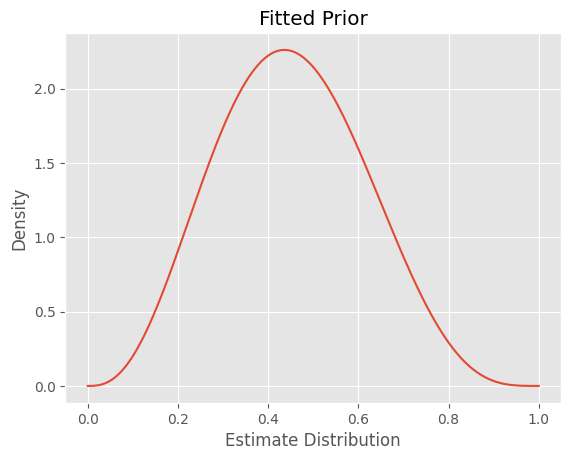

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def plot_fitted_prior(a0_mle: float, b0_mle: float):
    """Plot the fitted prior distribution.

    Args:
        a0_mle (float): Maximum likelihood estimate of parameter a0.
        b0_mle (float): Maximum likelihood estimate of parameter b0.
    """
    x = np.linspace(0, 1, 1000)
    plt.plot(x, st.beta.pdf(x, a0_mle, b0_mle))
    plt.title("Fitted Prior")
    plt.xlabel("Estimate Distribution")
    plt.ylabel("Density")
    plt.show()

plot_fitted_prior(a0_mle, b0_mle)

---
- **2f)**: In the code cell below, use your fitted parameters $(\widehat{a}_0, \widehat{b}_0)$ to compute the posterior means of all $K$ SEPs $$\widehat{q}^{\textrm{post-mean}}_k = \mathbb{E}[q_k \mid y_k, n_k, \widehat{a}_0, \widehat{b}_0]$$
    and compare them to the maximum likelihood estimates $$\widehat{q}^{\textrm{MLE}}_k = \underset{q_k}{\textrm{argmax}}\, P(y_k \mid n_k, q_k)$$.
    More specifically:
    
    - Compute the posterior means.

    - Compute the maximum likelihood estimates.
    
    - Generate a scatter plot where each $(x,y)$ point is a pair $(\widehat{q}^{\textrm{MLE}}_k, \widehat{q}^{\textrm{post-mean}}_k)$ for all $k=1\dots K$. For reference, also include the line $x=y$, and make sure the $x$- and $y$-axis both range over the full set of possible values.


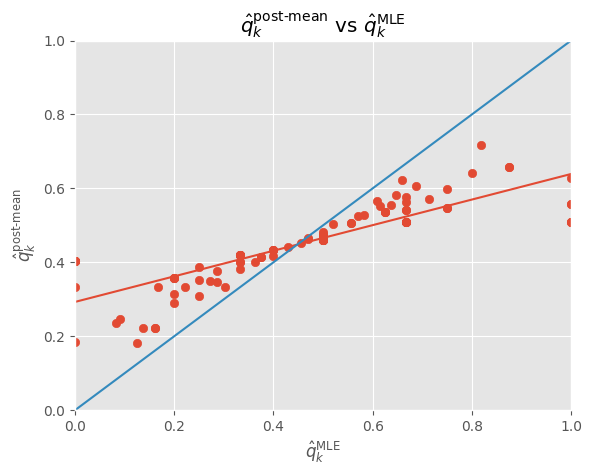

In [44]:
def plot_q_hat_comparison(a0_mle: float, b0_mle: float, y: np.array, n: np.array):
    """Plot the comparison between q_hat_MLE and q_hat_post_mean.

    Args:
        a0_mle (float): Maximum likelihood estimate of parameter a0.
        b0_mle (float): Maximum likelihood estimate of parameter b0.
        y (array): Array of the number of successes for each trial.
        n (array): Array of the number of trials.
    """
    # Calculate q_hat_MLE and q_hat_post_mean
    q_hat_post_mean = (a0_mle + y) / (a0_mle + b0_mle + n)
    q_hat_mle = y / n

    # Fit linear regression model
    lr_model = LinearRegression()
    lr_model.fit(q_hat_mle.reshape((-1,1)), q_hat_post_mean.reshape((-1,1)))

    # Generate points for plotting the regression line
    lr_x = np.linspace(0,1,1000)
    lr_y = lr_model.predict(lr_x.reshape((-1,1)))

    # Plot the regression line
    plt.plot(lr_x, lr_y)

    # Plot the identity line
    plt.plot(lr_x, lr_x)

    # Plot the data points
    plt.scatter(q_hat_mle, q_hat_post_mean)

    # Set labels and title
    plt.xlabel(r'$\hat{q}_k^{\text{MLE}}$')
    plt.ylabel(r'$\hat{q}_k^{\text{post-mean}}$')
    plt.title(r'$\hat{q}_k^{\text{post-mean}}$ vs $\hat{q}_k^{\text{MLE}}$')

    # Limit axis from 0 to 1
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Show the plot
    plt.show()

plot_q_hat_comparison(a0_mle, b0_mle, y, n)

----

- **2f)**: Discuss the plot you just generated.

    - What is the relationship between the maximum likelihood estimates and the posterior means?

    - Why does this make sense based on your understanding of the procedure you have implemented?

    - Comment on any other observations or insights.

Your answer here.

The relationship between Maximum Likelihood Estimates (MLE) and posterior means can be understood in the context of how each method incorporates prior information. MLE solely focuses on finding the parameter values that maximize the likelihood of observing the given data, without considering any prior knowledge. On the other hand, posterior means incorporate prior information by updating the parameter distribution using Bayes' theorem. Despite this difference, both MLE and posterior means share the likelihood function as the basis for their estimation.

In our implementation, we observe a positive linear correlation between $\hat{q}_k^{\text{post-mean}}$ and $\hat{q}_k^{\text{MLE}}$, consistent with our expectation. However, due to the influence of the prior distribution, the relationship is not perfect, resulting in deviations from the identity line.

It's important to note that while there is a relationship between MLE and posterior means, their differences in estimation methodologies lead to imperfect alignment between the two. This observation highlights the distinct characteristics of each method and underscores the significance of understanding their respective implications in statistical inference.
